<a href="https://colab.research.google.com/github/AdrianGabryla/MachineLearning/blob/main/03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import matplotlib
from keras.datasets import mnist
from keras import layers
from matplotlib import pyplot as plt

In [2]:
( train_images , train_labels ) , ( test_images ,
test_labels ) = mnist . load_data ()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
type(train_images)

numpy.ndarray

In [4]:
type(train_labels)

numpy.ndarray

Summarize:


In [5]:
print('Train:X=%s, y=%s' % (train_images.shape, train_labels.shape))
print('Test:X=%s, y=%s' % (test_images.shape, test_labels.shape))

Train:X=(60000, 28, 28), y=(60000,)
Test:X=(10000, 28, 28), y=(10000,)


In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
from tensorflow.keras.datasets import mnist

<function matplotlib.pyplot.show(close=None, block=None)>

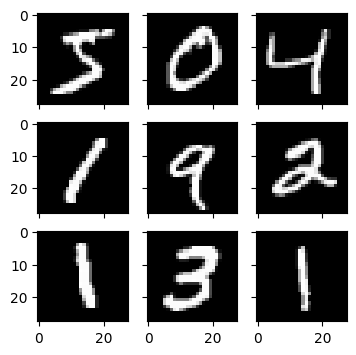

In [8]:
#grid
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
for i in range(3):
    for j in range(3):
        ax[i, j].imshow(train_images[i * 3 + j], cmap=plt.get_cmap("gray"))
plt.show

In [9]:
model = keras.Sequential(
[
  layers.Dense(512, activation="relu"),
  layers.Dense(10, activation="softmax")
])

In [10]:
model

<Sequential name=sequential, built=False>

In [11]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [12]:
X_train = train_images.reshape((60000, 28 * 28))
X_train = X_train.astype("float32") / 255
X_test = test_images.reshape((10000, 28 * 28))
X_test = X_test.astype("float32") / 255

In [13]:
X_train.shape

(60000, 784)

In [14]:
y_train = train_labels.copy()
y_test = test_labels.copy()

In [15]:
model . fit ( X_train , train_labels , epochs =5 ,
batch_size =128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8645 - loss: 0.4706
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9664 - loss: 0.1183
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9796 - loss: 0.0716
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9844 - loss: 0.0515
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9898 - loss: 0.0356


In [16]:
test_digits = X_test [0:10]
predictions = model . predict ( test_digits )
predictions [0] # Array of 10 probabilities
predictions [0]. argmax () # 7

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


np.int64(7)

In [17]:
test_labels[0]

np.uint8(7)

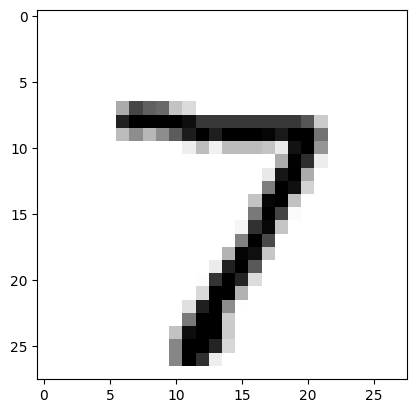

In [18]:
plt . imshow ( test_images[0] , cmap = plt . cm . binary )
plt . show ()


Accuracy:

In [19]:
test_loss, test_acc = model.evaluate(X_test, test_labels)
print(f"test_acc: {test_acc}")  # ~0.9785

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9755 - loss: 0.0799
test_acc: 0.9793999791145325


capture history:


In [20]:
history = model.fit(X_train, train_labels, validation_split=0.2, epochs=10,batch_size=128)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9935 - loss: 0.0261 - val_accuracy: 0.9914 - val_loss: 0.0280
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9956 - loss: 0.0181 - val_accuracy: 0.9928 - val_loss: 0.0254
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9969 - loss: 0.0140 - val_accuracy: 0.9897 - val_loss: 0.0324
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9975 - loss: 0.0105 - val_accuracy: 0.9910 - val_loss: 0.0288
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9986 - loss: 0.0078 - val_accuracy: 0.9896 - val_loss: 0.0313
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9995 - loss: 0.0050 - val_accuracy: 0.9907 - val_loss: 0.0299
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9992 - loss: 0.0051 - val_accuracy: 0.9897 - val_loss: 0.0317
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9994 - loss: 0.0042 - val_accu

In [21]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


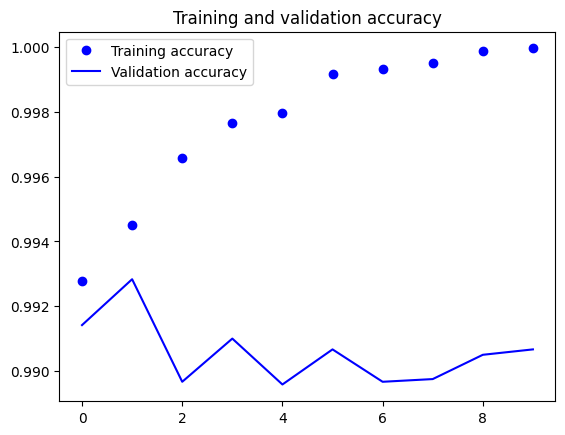

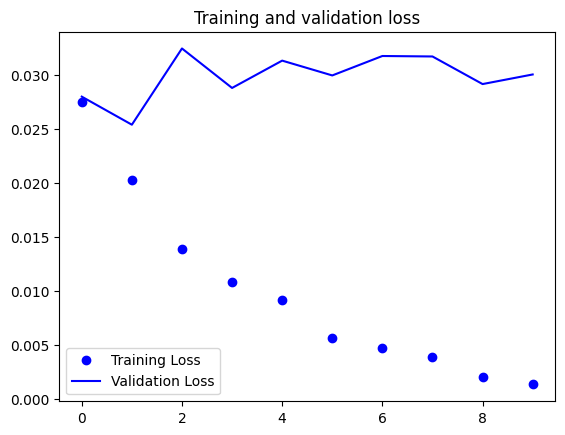

In [23]:
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


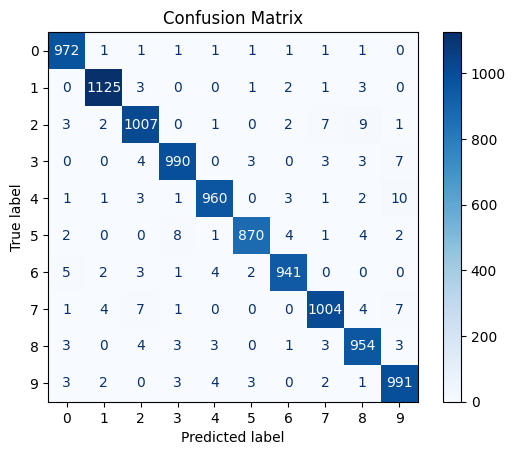

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
cm = confusion_matrix(test_labels, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()